QUESTION 2: <br>
B. Sentiment Analysis Using ANN on IMDb Movie Reviews<br>
(Link Provided at the top of the page to download the dataset Not mandatory to take all the instances of the dataset, You can trim the dataset)<br>
<br>
You are tasked with performing sentiment analysis on the IMDb movie review dataset using an Artificial Neural Network (ANN). The dataset contains movie reviews labeled as positive or negative.<br>
1. Design, implement, and evaluate an ANN model to classify the sentiment of IMDb movie reviews (positive or negative).<br>
2. Explain the preprocessing steps, model architecture, and performance evaluation results in your submission.<br>
3. Use One or more hidden layers with ReLU activation and an output layer with sigmoid activation for binary classification.<br>
4. Use the binary cross-entropy loss function for training the model.<br>
5. Provide the source code, the explanation of each step and visualize the necessary EDA steps and results.<br>
6. Justify the use of the ReLU and sigmoid activation functions.<br>
7. Explain why binary cross-entropy is suitable for this task.<br>

Dataset and Problem Overview<br>
<br>
Problem: Sentiment analysis is a text classification task that involves determining whether a given review expresses a positive or negative sentiment. The IMDb dataset contains labeled reviews (positive or negative), which makes it suitable for binary classification using an Artificial Neural Network (ANN).<br>
<br>
Goal: Build an ANN that classifies movie reviews as positive or negative using one or more hidden layers with ReLU activation, and a sigmoid activation in the output layer for binary classification.

1. Exploratory Data Analysis

Dataset Shape: (50000, 2)
Sentiment Distribution:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


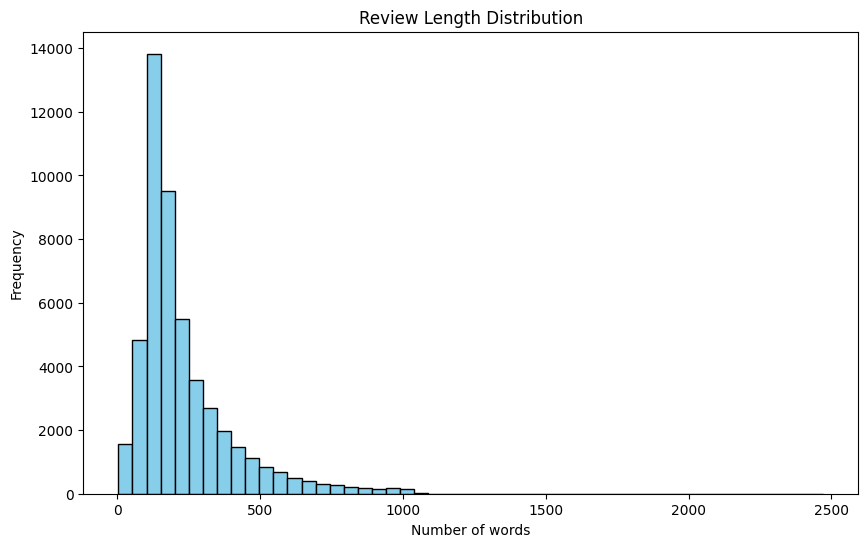

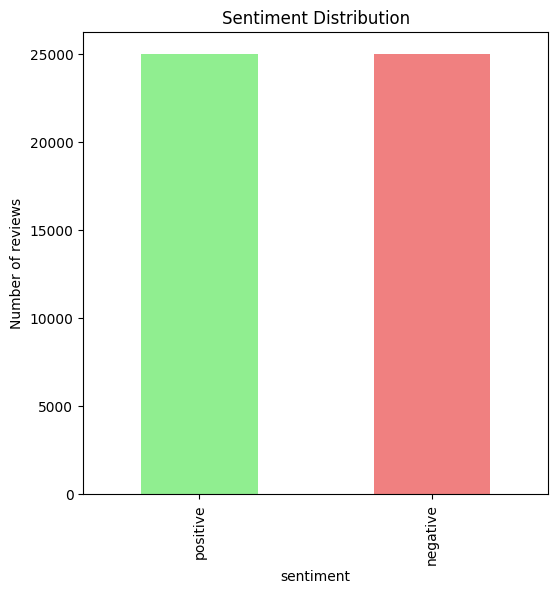

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('IMDB_Dataset.csv')

# 1. Check the shape of the dataset
print("Dataset Shape:", df.shape)

# 2. Distribution of the sentiment labels
sentiment_distribution = df['sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_distribution)

# 3. Calculate the number of words in each review
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# 4. Plot the review length distribution
plt.figure(figsize=(10,6))
plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Review Length Distribution')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

# 5. Visualize sentiment distribution
plt.figure(figsize=(6,6))
sentiment_distribution.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Sentiment Distribution')
plt.ylabel('Number of reviews')
plt.show()


2. Data Preprocessing<br>
<br>
Before training the ANN, it is essential to preprocess the text data. Text data must be tokenized, cleaned, vectorized, and split into training and testing sets.<br>
<br>
Preprocessing Steps:<br>
    a. Tokenization: Break text into individual words or tokens.<br>
    b. Lowercasing and Cleaning: Convert all text to lowercase and remove special characters.<br>
    c. Vectorization: Convert text to numerical representations using methods like TF-IDF or word embeddings.<br>
    d. Splitting: Split the data into training and test sets to evaluate the model's performance.<br>

In [15]:
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess reviews
def clean_review(review):
    review = re.sub(r'<.*?>', '', review)  # Remove HTML tags
    review = re.sub(r'[^a-zA-Z]', ' ', review).lower()  # Remove non-alphabet characters and lowercase
    review = ' '.join([word for word in review.split() if word not in stop_words])  # Remove stopwords
    return review

# Apply the cleaning function to the reviews
df['cleaned_review'] = df['review'].apply(clean_review)

# Encode the sentiment labels to binary (positive -> 1, negative -> 0)
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Tokenize manually and convert each review to a vector of word counts (one-hot encoded style)
vocabulary_size = 5000  # Set the size of the vocabulary
tokenizer = nltk.RegexpTokenizer(r'\w+')
word2index = {}

# Create word index
for review in df['cleaned_review']:
    tokens = tokenizer.tokenize(review)
    for word in tokens:
        if word not in word2index:
            if len(word2index) < vocabulary_size:
                word2index[word] = len(word2index)

# Convert reviews into sequences of indices
def review_to_sequence(review):
    tokens = tokenizer.tokenize(review)
    sequence = [word2index[word] for word in tokens if word in word2index]
    return sequence

df['review_sequence'] = df['cleaned_review'].apply(review_to_sequence)

# Pad sequences manually to a fixed length of 200
def pad_sequence(sequence, max_len=200):
    if len(sequence) > max_len:
        return sequence[:max_len]
    return sequence + [0] * (max_len - len(sequence))

df['padded_review'] = df['review_sequence'].apply(pad_sequence)

# Prepare input data (X) and labels (y)
X = np.array(df['padded_review'].tolist())
y = np.array(df['sentiment_encoded'].tolist())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\satch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Explanation:<br>
The reviews are cleaned by removing HTML tags and special characters, converting them to lowercase.<br>
We use TF-IDF (Term Frequency-Inverse Document Frequency) for vectorization to convert the text into numerical form.<br>
The data is split into training (80%) and testing (20%) sets.<br>

3. Building the ANN Model<br>
<br>
We will now build the ANN model using the Keras library. The architecture includes:<br>
Input layer<br>
Hidden layers with ReLU activation<br>
Output layer with sigmoid activation<br>
Binary cross-entropy as the loss function<br>

In [19]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Binary Cross-Entropy Loss
def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # Clipping to avoid log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Derivative of Binary Cross-Entropy Loss
def binary_cross_entropy_derivative(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return - (y_true / y_pred) + (1 - y_true) / (1 - y_pred)

# Initialize weights and biases
def initialize_parameters(input_size, hidden_layer_sizes, output_size):
    parameters = {}
    layer_sizes = [input_size] + hidden_layer_sizes + [output_size]

    for l in range(1, len(layer_sizes)):
        parameters['W' + str(l)] = np.random.randn(layer_sizes[l], layer_sizes[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_sizes[l], 1))

    return parameters

# Forward propagation
def forward_propagation(X, parameters):
    cache = {}
    A = X.T  # Transpose input to align for matrix multiplication (200,40000)
    L = len(parameters) // 2  # number of layers

    for l in range(1, L):
        Z = np.dot(parameters['W' + str(l)], A) + parameters['b' + str(l)]
        A = relu(Z)
        cache['Z' + str(l)] = Z
        cache['A' + str(l)] = A

    ZL = np.dot(parameters['W' + str(L)], A) + parameters['b' + str(L)]
    AL = sigmoid(ZL)
    cache['Z' + str(L)] = ZL
    cache['A' + str(L)] = AL

    return AL, cache

# Backward propagation
def backward_propagation(X, Y, cache, parameters):
    grads = {}
    m = X.shape[0]
    L = len(parameters) // 2  # number of layers

    # Output layer gradients
    dZL = cache['A' + str(L)] - Y.T
    grads['dW' + str(L)] = np.dot(dZL, cache['A' + str(L-1)].T) / m
    grads['db' + str(L)] = np.sum(dZL, axis=1, keepdims=True) / m

    # Backpropagate through hidden layers
    for l in reversed(range(1, L)):
        dA = np.dot(parameters['W' + str(l+1)].T, dZL)
        dZ = dA * relu_derivative(cache['Z' + str(l)])
        grads['dW' + str(l)] = np.dot(dZ, X.T if l == 1 else cache['A' + str(l-1)].T) / m
        grads['db' + str(l)] = np.sum(dZ, axis=1, keepdims=True) / m
        dZL = dZ

    return grads

# Update parameters using gradient descent
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2  # number of layers

    for l in range(1, L+1):
        parameters['W' + str(l)] -= learning_rate * grads['dW' + str(l)]
        parameters['b' + str(l)] -= learning_rate * grads['db' + str(l)]

    return parameters

# Train the model
def train(X_train, Y_train, input_size, hidden_layer_sizes, output_size, epochs, learning_rate):
    parameters = initialize_parameters(input_size, hidden_layer_sizes, output_size)

    for epoch in range(epochs):
        # Forward propagation
        AL, cache = forward_propagation(X_train, parameters)
        
        # Compute cost
        cost = binary_cross_entropy(Y_train, AL)
        
        # Backward propagation
        grads = backward_propagation(X_train, Y_train, cache, parameters)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost}")

    return parameters

# Predict function
def predict(X, parameters):
    AL, _ = forward_propagation(X, parameters)
    return np.round(AL.T)




In [20]:
# Example usage of the above neural network with the IMDb dataset
input_size = X_train.shape[1]  # Number of input features (200 in this case after padding)
hidden_layer_sizes = [128, 64]  # Hidden layer sizes
output_size = 1  # Binary output
epochs = 1000
learning_rate = 0.01






In [21]:
# Train the model
parameters = train(X_train, y_train, input_size, hidden_layer_sizes, output_size, epochs, learning_rate)



ValueError: shapes (128,40000) and (200,40000) not aligned: 40000 (dim 1) != 200 (dim 0)

In [ ]:
# Test the model
predictions = predict(X_test, parameters)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")